<built-in method keys of dict object at 0x00000000113C67B8>
person with all zero data is: LOCKHART EUGENE E
LOCKHART EUGENE E


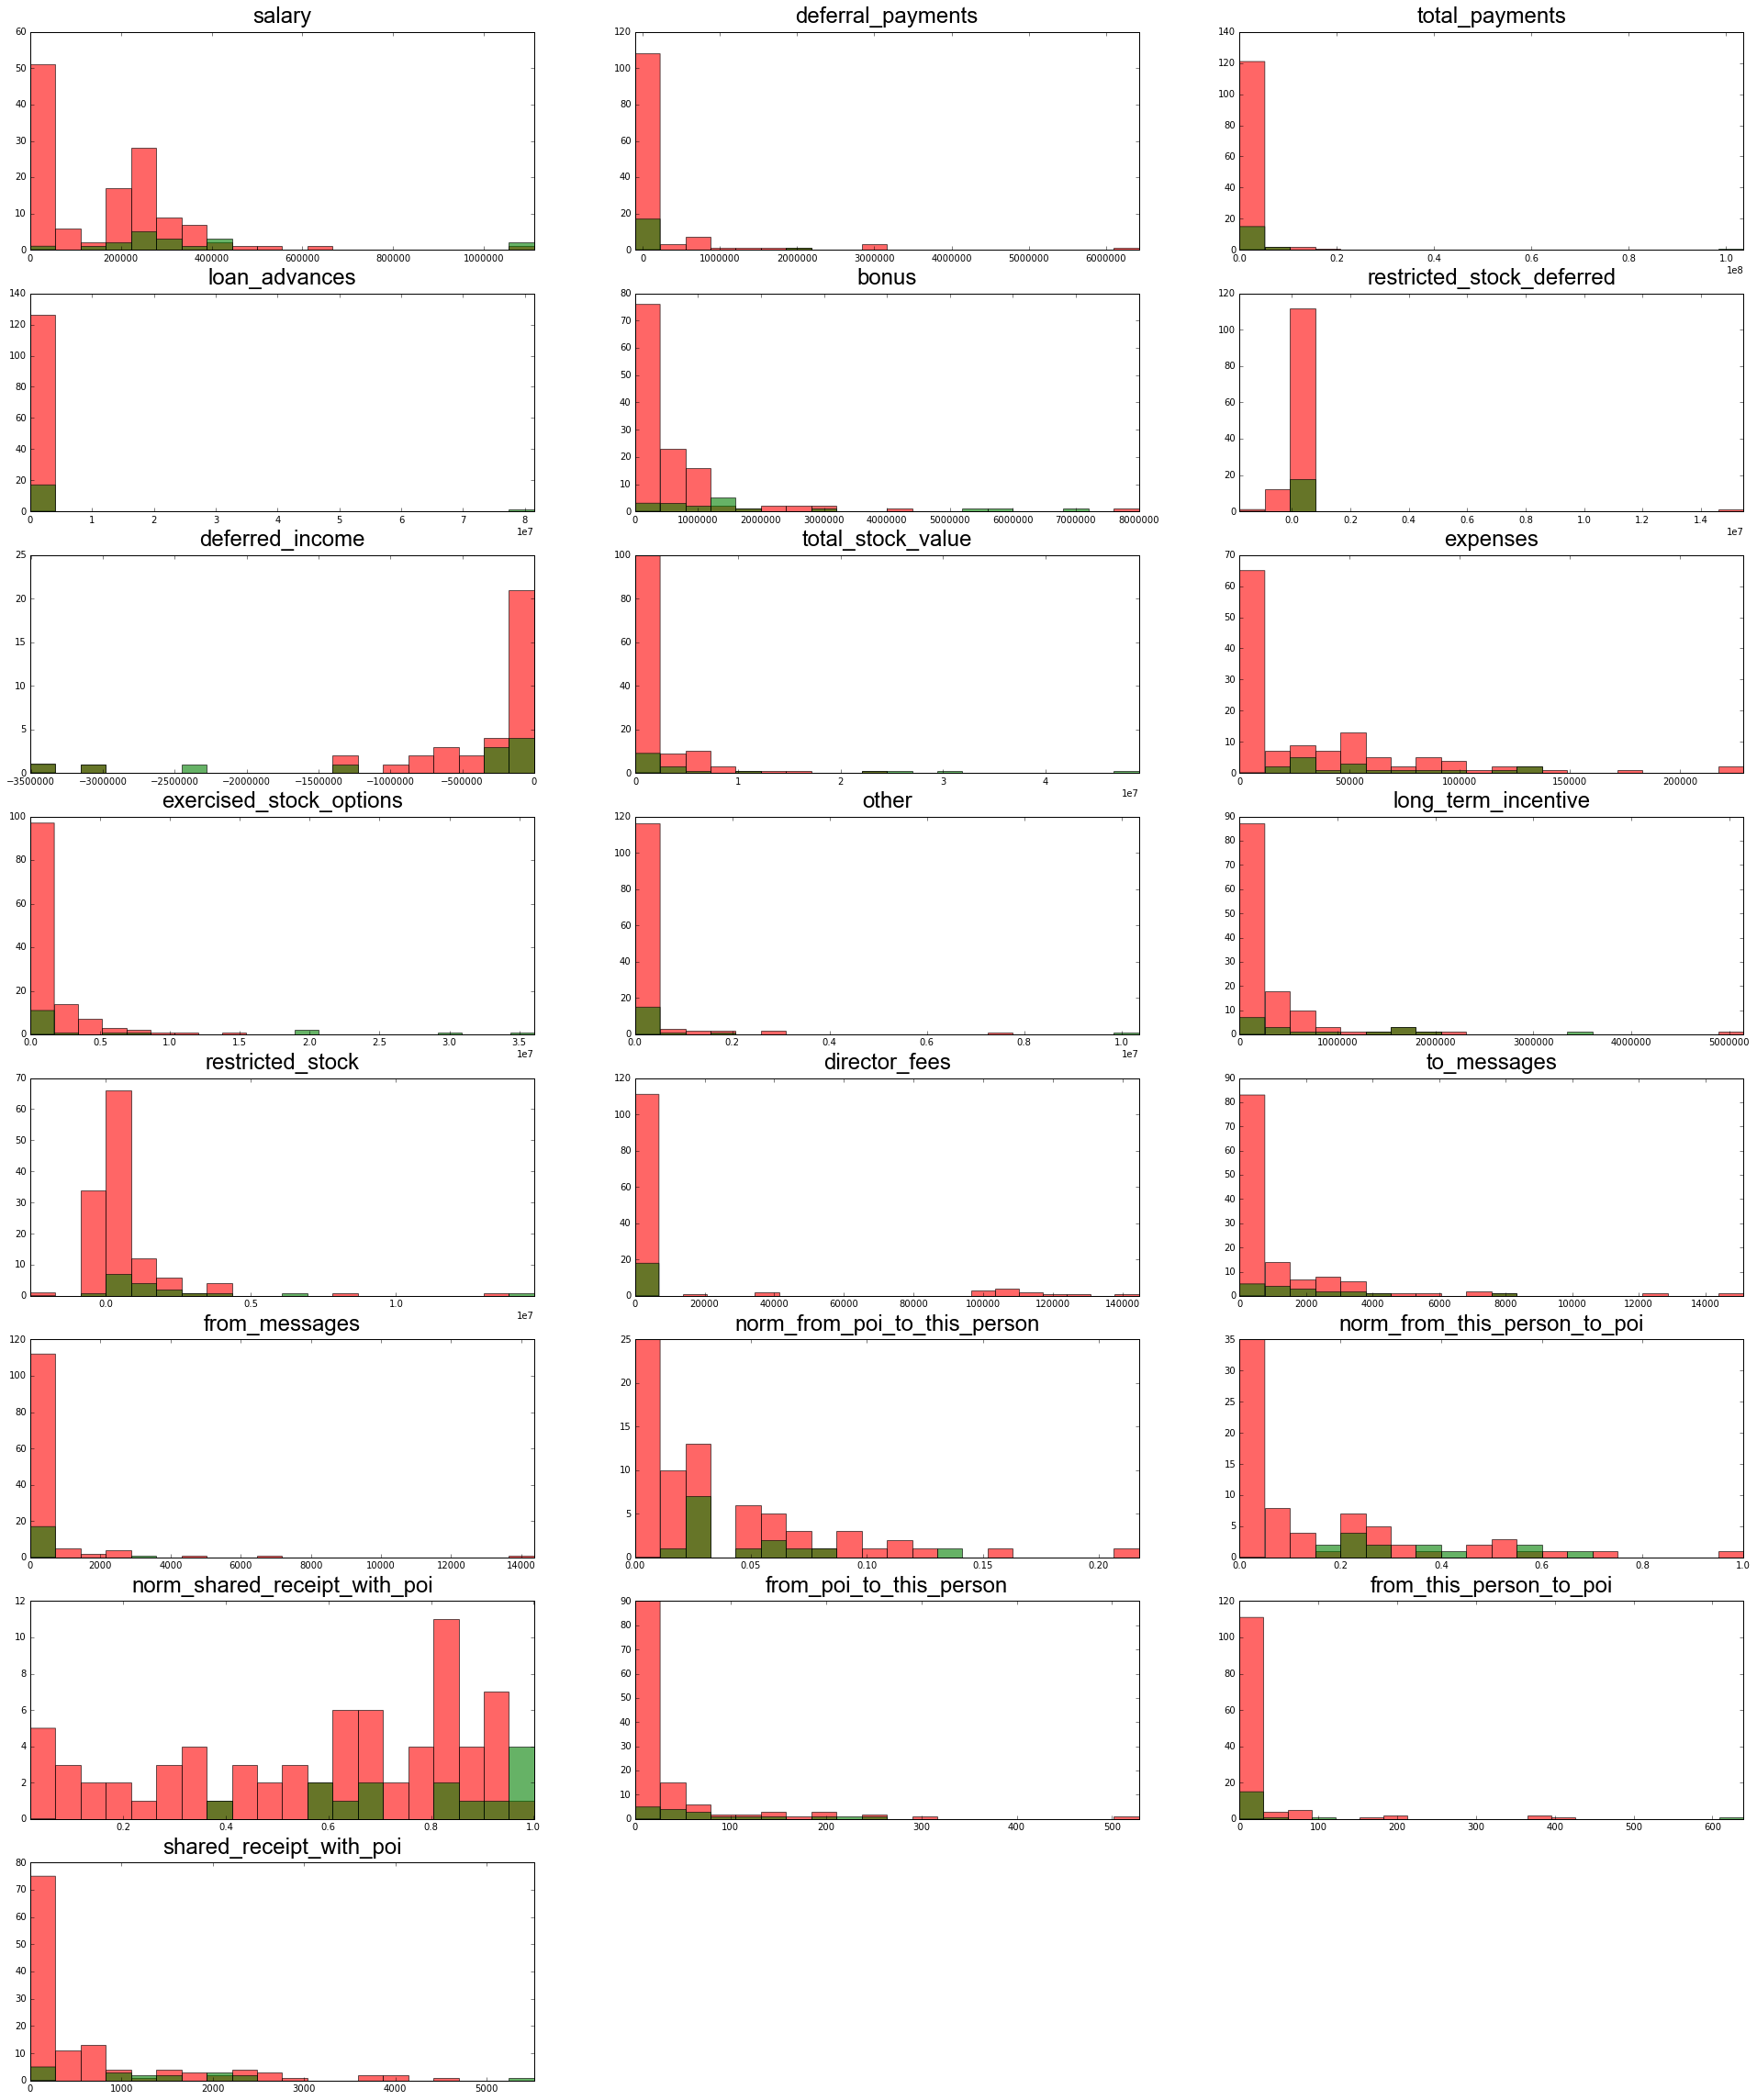

In [8]:
%matplotlib inline
import sys
import pickle
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as np
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit, email_parser
from tester import dump_classifier_and_data
from plot_functions import *
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi', 'salary', 'deferral_payments', 'total_payments', \
'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', \
'total_stock_value', 'expenses', 'exercised_stock_options', 'other', \
'long_term_incentive', 'restricted_stock', 'director_fees', 'to_messages', \
 'from_poi_to_this_person', 'from_messages', \
 'from_this_person_to_poi', 'shared_receipt_with_poi']  # You will need to use more features

features_list2 = ['poi', 'salary', 'deferral_payments', 'total_payments', \
'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', \
'total_stock_value', 'expenses', 'exercised_stock_options', 'other', \
'long_term_incentive', 'restricted_stock', 'director_fees', 'to_messages', \
 'from_messages', 'norm_from_poi_to_this_person', 'norm_from_this_person_to_poi', \
 'norm_shared_receipt_with_poi', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi']
 
###features_list2 = ['poi', \
### 'norm_from_poi_to_this_person', 'norm_from_this_person_to_poi', 'shared_receipt_with_poi']

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict
my_dataset.pop('TOTAL',0)
print my_dataset.keys

### Extract features and labels from dataset for local testing, email parser parse out the name list and the corresponding email
data = featureFormat(my_dataset, features_list, sort_keys = False)
name_list, emails = email_parser(my_dataset)

### #90 has all the data with 'NA', filter it out from the dataset
print name_list.pop(90)
emails.pop(90)
labels, features = targetFeatureSplit(data)

df = DataFrame(data=features, columns=features_list[1:])
df['poi'] = labels

df_describe_bypoi = df.groupby('poi').describe()
df['name'] = name_list
df['email'] = emails
df['norm_from_poi_to_this_person'] = df['from_poi_to_this_person']/df['to_messages']
df['norm_shared_receipt_with_poi'] = df['shared_receipt_with_poi']/df['to_messages']
df['norm_from_this_person_to_poi'] = df['from_this_person_to_poi']/df['from_messages']

#
figure = plt.figure(figsize=(27, 40))
j = 1
for i, feature1 in enumerate(features_list2[1:]):
    
#    classifier_bin_plot(df, features_list2[0], feature1, 20)
    

    # Create outcomes DataFrame
    y_name = features_list2[0]
    key = feature1
    bin_step = 20
    all_data = df[[y_name, key]]    
    # Remove NaN values from Age data
    all_data = all_data[~np.isnan(all_data[key])]        
    # Divide the range of data into bins and count survival rates
    min_value = all_data[key].min()
    max_value = all_data[key].max()
    value_range = max_value - min_value
    bins = np.arange(min_value, max_value +  value_range/bin_step, value_range/bin_step )
    y0 = all_data[all_data[y_name] == 0][key].reset_index(drop = True)
    y1 = all_data[all_data[y_name] == 1][key].reset_index(drop = True)
    ax = plt.subplot(len(features_list2)/3+1,  3, j)
    ax.hist(y0, bins = bins, alpha = 0.6, color = 'red', label = 'y0')
    ax.hist(y1, bins = bins, alpha = 0.6, color = 'green', label = 'y1')
    ax.set_xlim(bins.min(), bins.max())
    title_font = {'fontname':'Arial', 'size':'24', 'color':'black', 'weight':'normal', 'verticalalignment':'bottom'}
    ax.set_title(key, **title_font)
#    ax.legend(framealpha = 0.8)
    j+=1
    
figure.subplots_adjust(left=.02, right=.98)
plt.show()
